In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [20]:
dataset = pd.read_csv('raw_data.csv', header=0, index_col=0)
dataset.head()
# Sentiment = percentile of 

,VIX_lastday,Sentiment,VIX,VIX_nextday,num,posi,nega,sum,dVIX,fVIX,DV,DM,DN,DT
Day,,,,,,,,,,,,,,
21/1/2020,12.85,0.60,12.91,12.98,20,8,12,48,0.004669,0.005422,1,1,1,0
22/1/2020,12.91,0.39,12.98,14.56,28,17,11,44,0.005422,0.121726,1,0,0,1
23/1/2020,12.98,0.56,14.56,14.56,55,24,31,124,0.121726,0.000000,1,1,1,1
24/1/2020,14.56,0.48,14.56,14.56,44,23,21,84,0.000000,0.000000,0,0,0,0
25/1/2020,14.56,0.31,14.56,18.23,51,35,16,64,0.000000,0.252060,0,0,0,1


If we want to look at leading indicator, we drop the data when the next day is not a trading day and VIX doesn't change;

IF we want to look at lagging indicator, we drop the data when the current day is not atrading day and VIX doesn't chagne.

In [27]:
#dataset= dataset[dataset.dVIX != 0]
dataset= dataset[dataset.fVIX != 0]

Our plotting function

In [23]:
def runplt(x, y,yl):
    plt.figure()
    plt.title("predicted-actual value comparison")
    plt.xlabel("date point")
    if yl == 'VIX Value':
            plt.ylabel("VIX Value")
    elif yl == 'dVIX absolute value':
            plt.ylabel("dVIX absolute value")
    elif yl == 'dVIX percentile change':
            plt.ylabel("dVIX percentile change")
    
    plt.plot(range(len(x)),x,'b',label="predict")
    plt.plot(range(len(y)),y,'r',label="test")
    plt.legend(loc="upper right")
    plt.grid(True)
    return plt

First roughly take a look at the relations between dependent and independent variables 

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.close(fig=None)>

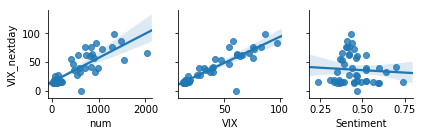

In [24]:
sns.pairplot(dataset,x_vars=['num','VIX','Sentiment'],y_vars='VIX_nextday',size=2,aspect=1,kind='reg')
plt.show
plt.close

Following are our results. We only show part of what we have tested, and most of the insignificant results have been dropped.

1. Including the historical VIX in our model

                            OLS Regression Results                            
Dep. Variable:            VIX_nextday   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     215.1
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.63e-18
Time:                        14:24:22   Log-Likelihood:                -106.89
No. Observations:                  33   AIC:                             219.8
Df Residuals:                      30   BIC:                             224.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4565      1.921      2.320      0.0

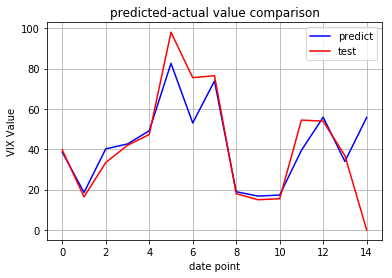

In [28]:
X=pd.DataFrame(dataset,columns=['VIX','num'])
y=dataset.VIX_nextday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.VIX+model.params[2]*X_test.num\
#+model.params[3]*X_test.Sentiment

# ---------- plot2
plt=runplt(pred_value,y_test, 'VIX Value')
# plt.plot(pred_value,y_test)
plt.show()

2. The rate of daily change (leading)

                            OLS Regression Results                            
Dep. Variable:                   fVIX   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.2465
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.783
Time:                        14:26:08   Log-Likelihood:                 12.202
No. Observations:                  33   AIC:                            -18.40
Df Residuals:                      30   BIC:                            -13.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0472      0.042      1.132      0.2

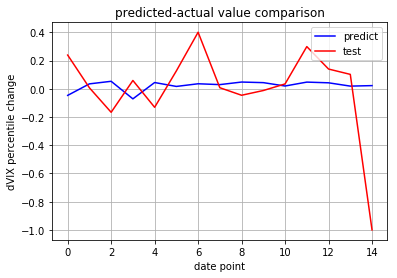

In [30]:
X=pd.DataFrame(dataset,columns=['num','posi'])
y=dataset.fVIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.posi

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX percentile change')
# plt.plot(pred_value,y_test)
plt.show()

3. Absolute change of VIX index (leading)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.2439
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.785
Time:                        14:32:24   Log-Likelihood:                -111.79
No. Observations:                  33   AIC:                             229.6
Df Residuals:                      30   BIC:                             234.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1777      1.807     -0.098      0.9

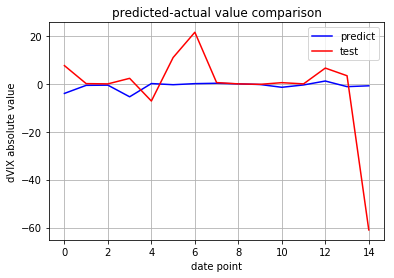

In [40]:
X=pd.DataFrame(dataset,columns=['num','posi'])
y=dataset.VIX_nextday - dataset.VIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print (model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.posi

# ---------- plot2
plt=runplt(pred_value,y_test,'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

Then we test lagging indicator

In [34]:
dataset = pd.read_csv('raw_data.csv', header=0, index_col=0)
dataset.head()
# Sentiment = percentile of 

dataset= dataset[dataset.dVIX != 0]

1. rate of daily change (lagging)

                            OLS Regression Results                            
Dep. Variable:                   dVIX   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.6634
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.522
Time:                        14:29:23   Log-Likelihood:                 16.079
No. Observations:                  33   AIC:                            -26.16
Df Residuals:                      30   BIC:                            -21.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0557      0.037      1.487      0.1

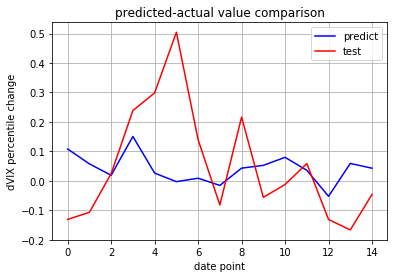

In [35]:
X=pd.DataFrame(dataset,columns=['num','posi'])
y=dataset.dVIX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.posi

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX percentile change')
# plt.plot(pred_value,y_test)
plt.show()

2. absolute change of VIX (lagging) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.075
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.354
Time:                        14:30:11   Log-Likelihood:                -108.10
No. Observations:                  33   AIC:                             222.2
Df Residuals:                      30   BIC:                             226.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0997      1.616      0.681      0.5

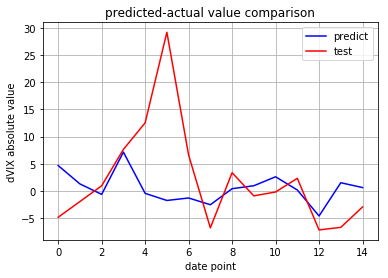

In [36]:
X=pd.DataFrame(dataset,columns=['num','posi'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.posi

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

Finally, we test different proportion of training and testing data.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.503
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.236
Time:                        14:31:31   Log-Likelihood:                -123.05
No. Observations:                  38   AIC:                             252.1
Df Residuals:                      35   BIC:                             257.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8756      1.509      0.580      0.5

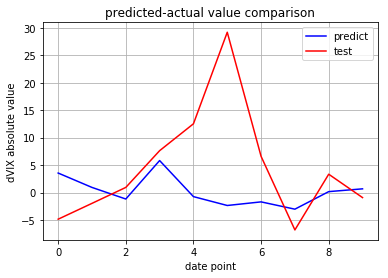

In [37]:
X=pd.DataFrame(dataset,columns=['num','posi'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.posi

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.009
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.379
Time:                        14:31:42   Log-Likelihood:                -93.738
No. Observations:                  28   AIC:                             193.5
Df Residuals:                      25   BIC:                             197.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0201      1.927      0.529      0.6

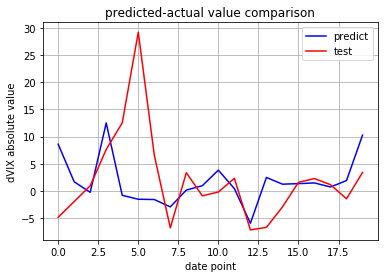

In [38]:
X=pd.DataFrame(dataset,columns=['num','posi'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.posi

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.8354
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.448
Time:                        14:31:53   Log-Likelihood:                -81.683
No. Observations:                  24   AIC:                             169.4
Df Residuals:                      21   BIC:                             172.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5370      2.269      0.237      0.8

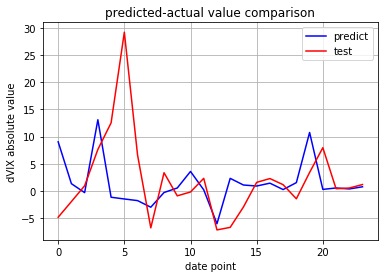

In [39]:
X=pd.DataFrame(dataset,columns=['num','posi'])
y=dataset.VIX - dataset.VIX_lastday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num+model.params[2]*X_test.posi

# ---------- plot2
plt=runplt(pred_value,y_test, 'dVIX absolute value')
# plt.plot(pred_value,y_test)
plt.show()